In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Loading dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [3]:
# Hyperparameters
learning_rate = 0.01
max_epoch = 5000
N = y_train.size
input_size = X_train.shape[1]
hidden_size = 2
output_size = 3

In [4]:
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

In [5]:
# Helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def mean_squared_error(y_pred, y_true):
    # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_true_one_hot = np.eye(output_size)[y_true]
    # Reshape y_true_one_hot to match y_pred shape
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)
    # Compute the mean squared error between y_pred and y_true_reshaped
    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)
    return error
 
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
    return acc.mean()
 

In [6]:
results = pd.DataFrame(columns=["mse", "accuracy"])

# Training loop
for epoch in tqdm(range(max_epoch)):
    
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)
    
    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

  0%|          | 0/5000 [00:00<?, ?it/s]C:\Users\riyag\AppData\Local\Temp\ipykernel_21968\2065367203.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
100%|██████████| 5000/5000 [00:01<00:00, 2717.54it/s]


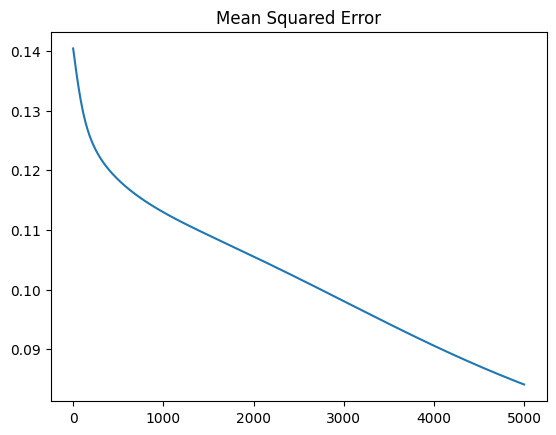

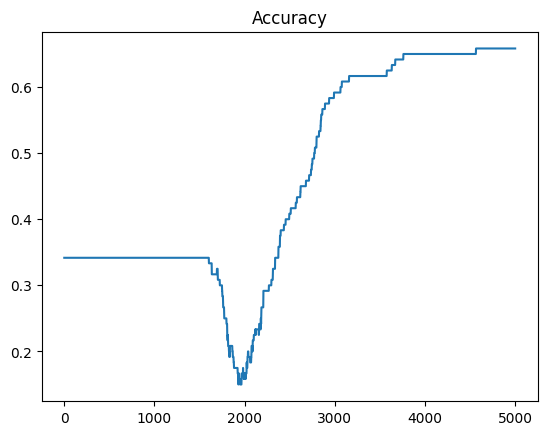

In [7]:
# Visualizing the results
results.mse.plot(title="Mean Squared Error")
plt.show()
 
results.accuracy.plot(title="Accuracy")
plt.show()

In [8]:
# Test the model
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))

Test accuracy: 0.7
